<a href="https://colab.research.google.com/github/mnogoruk/visualization/blob/hw5/Visualization4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install missingno

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [2]:
while_wine_dataset_url = 'https://raw.githubusercontent.com/mnogoruk/visualization/main/winequality-white.csv'
red_wine_dataset_url = 'https://raw.githubusercontent.com/mnogoruk/visualization/main/winequality-red.csv'

white_wine_data_frame = pd.read_csv(while_wine_dataset_url, delimiter=';', error_bad_lines=False)
red_wine_data_frame = pd.read_csv(red_wine_dataset_url, delimiter=';', error_bad_lines=False)

white_wine_data_frame['type'] = 'white'
red_wine_data_frame['type'] = 'red'

merged_data_frame = pd.concat([white_wine_data_frame, red_wine_data_frame], ignore_index=True)

In [3]:
df = merged_data_frame

In [4]:
class Filter:

  def __init__(self, data_frame):
    self.data_frame = data_frame

  def gte(self, field, value):
    return Filter(self.data_frame[self.data_frame[field] >= value])
  
  def gt(self, field, value):
    return Filter(self.data_frame[self.data_frame[field] > value])
  
  def lte(self, field, value):
    return Filter(self.data_frame[self.data_frame[field] <= value])
  
  def lt(self, field, value):
    return Filter(self.data_frame[self.data_frame[field] < value])

  def get(self):
    return self.data_frame

  

In [5]:
dry_wine = Filter(df).lte('residual sugar', 3).get()

In [6]:
semi_dry_wine = Filter(df).gt('residual sugar', 3).lte('residual sugar', 7).get()

In [7]:
semi_sweet_wine = Filter(df).gt('residual sugar', 7).lte('residual sugar', 12).get()

In [8]:
sweet_wine = Filter(df).gt('residual sugar', 12).get()

In [9]:
alcholo_lvl = pd.DataFrame(data={
    'type': ['dry wines', 'semi-dry wines', 'semi-sweet wines', 'sweet wines'], 
    'average alcohol': [dry_wine['alcohol'].mean(), semi_dry_wine['alcohol'].mean(), semi_sweet_wine['alcohol'].mean(), sweet_wine['alcohol'].mean()]})


In [10]:
types_amount = pd.DataFrame(data={
    'type': ['dry wines', 'semi-dry wines', 'semi-sweet wines', 'sweet wines'], 
    'amount': [dry_wine['alcohol'].count(), semi_dry_wine['alcohol'].count(), semi_sweet_wine['alcohol'].count(), sweet_wine['alcohol'].count()]})


<BarContainer object of 4 artists>

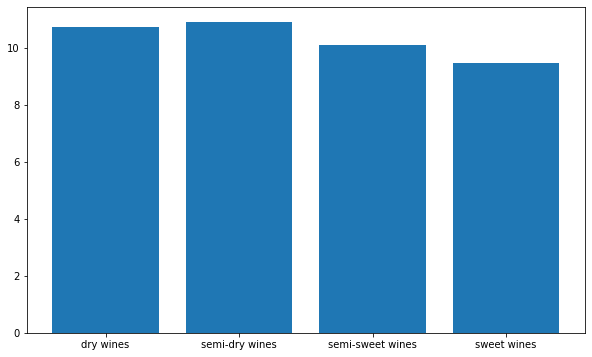

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(alcholo_lvl['type'], alcholo_lvl['average alcohol'])

<BarContainer object of 4 artists>

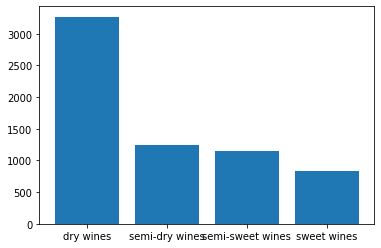

In [16]:
fig, ax = plt.subplots()
ax.bar(types_amount['type'], types_amount['amount'])

In [17]:
alcholo_lvl = alcholo_lvl[:3]

In [18]:
df_correlation = df.corr()

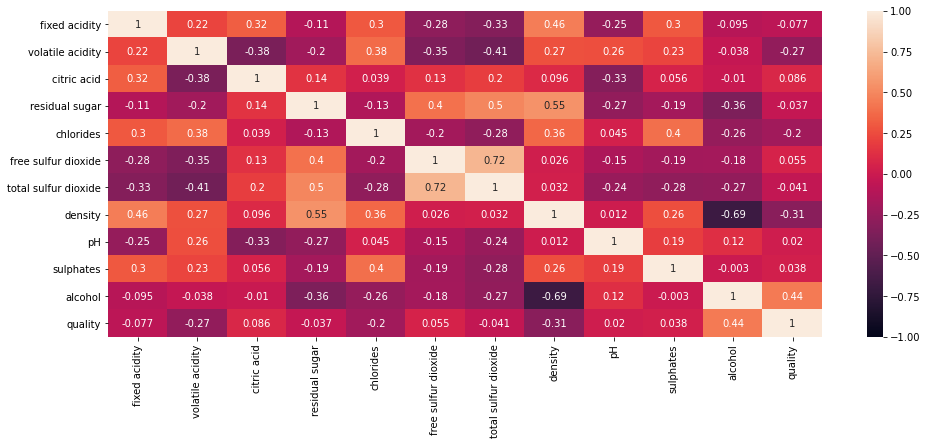

In [19]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(ax=ax, data=df_correlation,  vmin=-1, vmax=1, annot=True)

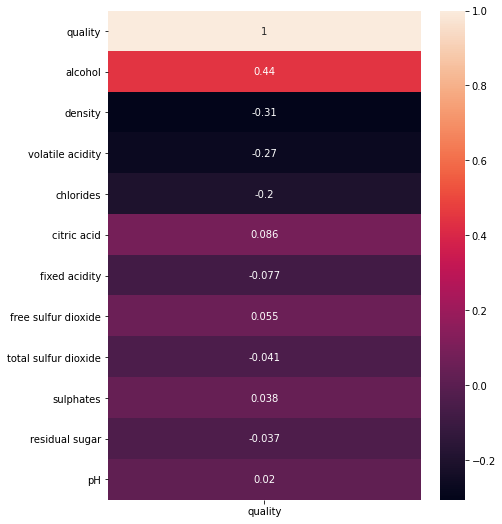

In [23]:
fig, ax = plt.subplots(figsize=(7, 9))
sns.heatmap(ax=ax, data=df_correlation[['quality']].sort_values(by='quality', ascending=False, key=abs), annot=True)

In [24]:
european_quality = {"min alcohol": 8.5, "max volatile acidity": 1.2, "min pH": 2.8, "max pH": 3.6}

In [25]:
european_quality_wines = Filter(df).gt('alcohol', 8.5).lt('volatile acidity', 1.2).gt('pH', 2.8).lt('pH', 3.6).get()

In [26]:
european_quality_wines_amount = european_quality_wines[['type']].count()['type']
df_amount = df[['type']].count()['type']
not_european_quality_wines_amount = df_amount - european_quality_wines_amount

([<matplotlib.patches.Wedge at 0x7f75b48c6b90>,
 [Text(1.097622294955289, 0.07228622010511239, 'вина не европейского качества'),
  Text(-1.0976222941092983, -0.07228623295096433, 'вина европейского качества')])

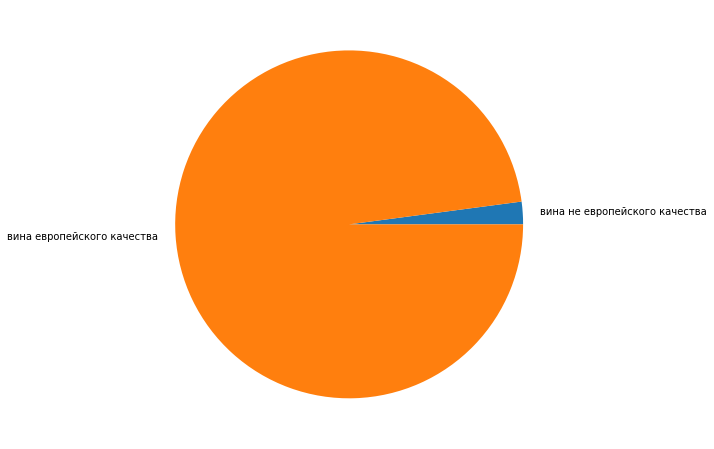

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie((not_european_quality_wines_amount, european_quality_wines_amount), labels=('вина не европейского качества', "вина европейского качества"))

<BarContainer object of 2 artists>

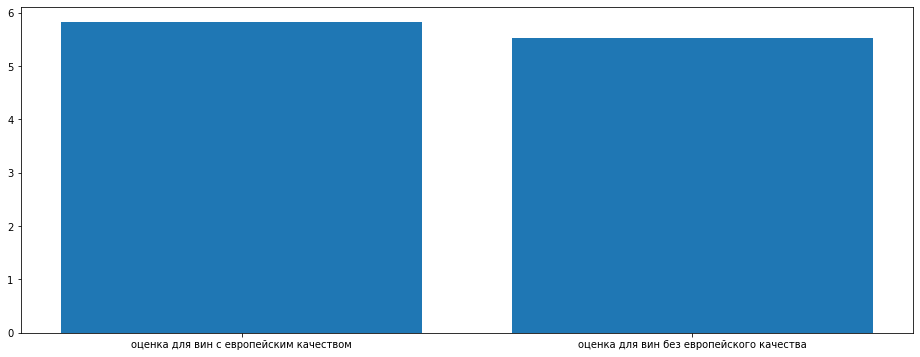

In [143]:
european_quality_wines_mean_quality = european_quality_wines['quality'].mean()
not_european_quality_wines_mean_quality = df[~df.apply(tuple, 1).isin(european_quality_wines.apply(tuple, 1))]['quality'].mean()
fig, ax = plt.subplots(figsize=(16, 6))


ax.bar(('оценка для вин с европейским качеством', 'оценка для вин без европейского качества'), (european_quality_wines_mean_quality, not_european_quality_wines_mean_quality))